# Анализ игровых платформ

### Описание проекта

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Описание данных games.csv

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (от 0 до 100)
* User_Score — оценка пользователей (от 0 до 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Шаг 1. Открытие файла с данными и изучение общей информации

Путь к файлу: /datasets/games.csv

### Шаг 2. Подготовка данных

* Заменить названия столбцов (привести к нижнему регистру).
* Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему.
* Обработать пропуски при необходимости.
* Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать.
* Описать причины, которые могли привести к пропускам.
* Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Пояснить, как обработать это значение.
* Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

### Шаг 3. Провести исследовательский анализ данных

* Посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. Найти популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?
* Определить, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
* Далее работать только с данными, которые определили. Не учитывать данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
* Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Описать результат.
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулировать выводы и соотнести их с продажами игр на других платформах.
* Посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Шаг 4. Составить портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Описать различия в долях продаж.
* Самые популярные жанры (топ-5). Пояснить разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Шаг 5. Проведите исследование статистических показателей

Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы. Описать распределения.

### Шаг 6. Проверка гипотез

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задать самостоятельно пороговое значение alpha.
Пояснить:
* Как сформулирована нулевую и альтернативную гипотезы.
* Какой критерий применен для проверки гипотез и почему.

### Шаг 7. Написать общий вывод

# 1. Открытие файла и получение общей информации

In [1]:
# вызов библиотеки pandas
import pandas as pd
# импорт библиотеки matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки numpy
import numpy as np
# импорт библиотеки seaborn
import seaborn as sns
# импорт библиотеки scipy
from scipy import stats as st
import scipy
# импорт библиотеки warnings
import warnings
# чтение файла
games=pd.read_csv('/datasets/games.csv')
# просмотр общей информации о датасете
games.info()
# вывод на экран датасета
display(games)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Вывод:  
в таблице почти нет пропусков данных в данных о названиях платформ, игр и продажах, и достаточно много пропусков в столбцах оценок и рейтинга. Возможно, эти пропуски не случайны.

# 2. Подготовка данных

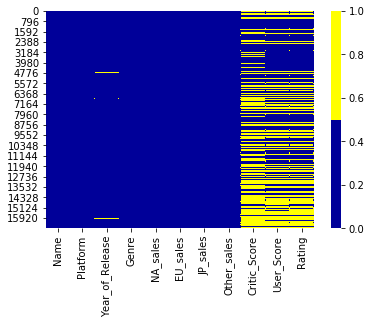

In [2]:
colours = ['#000099', '#ffff00'] 
sns.heatmap(games.isnull(), cmap=sns.color_palette(colours))

#### Вывод: 
данные пропущенны только в столбцах оценок и рейтинга, поэтому удалять строки с отсутствующими в них значениями не будем. И, да, они не случайны, пропуски сотвествуют почти для всех строк с отсутствующими значениями.

In [3]:
# переименование столбцов, перевод названий в нижний регистр
games.columns = games.columns.str.lower()
# просмотр уникальных значений столбца пользовательского рейтинга
print(games['user_score'].unique())
# просмотрены уникальные значения для столбца рейтинга, чтобы увидеть значение tbd из задания. Расшифровка звучит как "to be detirmined", или "будет определено"
# заменяем формат столбца user_score на числовой, а столбец year_of_release на дату
games['user_score']=pd.to_numeric(games['user_score'], errors='coerce')
# заменим пропущенные значения в столбце rating - на пустую строку
games['rating'] = games['rating'].fillna(value='')
games['year_of_release'] = games['year_of_release'].fillna(2045) 
#2045 год - год действий в фильме "Первому игроку приготовиться"
games['year_of_release'] = games['year_of_release'].astype('int')
games['year_of_release'] = games['year_of_release'].astype('str')
games['sample_date'] = '-01-01'
games['year_of_release'] = games['year_of_release'] + games['sample_date']
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format='%Y-%m-%d').dt.year
del games['sample_date']
games.head()
# удаляем дубликаты
games.drop_duplicates().reset_index(drop=True)
# удаление строк с пропущенными значениями не было выполнено, т.к. пропущены значения только в столбцах рейтинга и оценок пользователей и критиков, при обработке зависимостей в данных столбцах данный факт будет учтен.
# подсчет суммарных продаж во всех регионах, формирование отдельного столбца
games['sum_sales']=games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']
# вывод на экран преобразованного дата сета
display(games)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,,0.01


In [4]:
#Подсчет количества выпускаемых игр в разные годы
games.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
2045     269
Name: name, dtype: int64

Количество выпускаемых игр с 1980(9 игр) по 2008(1427 игр) увеличивалось, с 2009(1426 игр) - пошло на спад(в 2016 - 502 игры).

# Исследовательский анализ данных

In [5]:
# сортировка столбца платформ по количеству суммарных продаж
games.groupby(by='platform').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head()

,sum_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Наиболее популярны платформы: PS2,  X360, PS3, Wii, DS.

Text(0.5, 1.0, 'Wii')

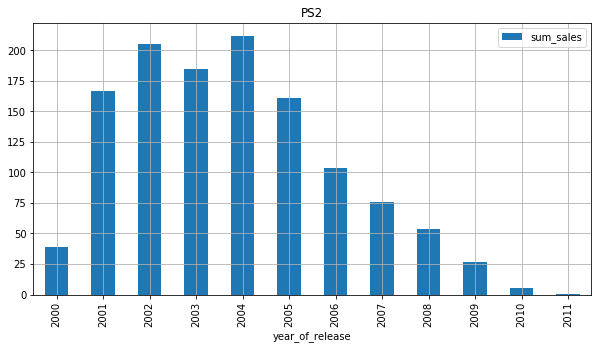

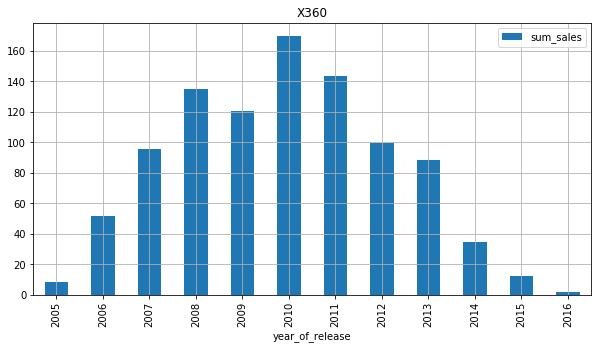

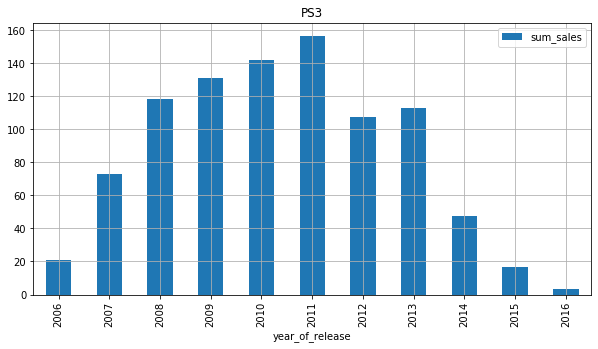

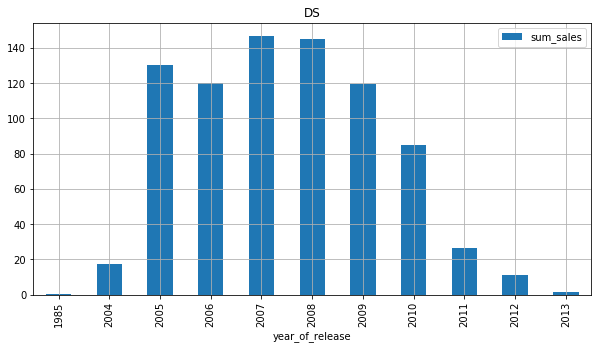

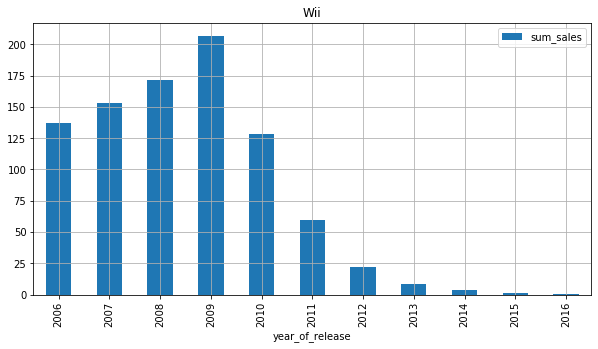

In [6]:
# создание гистограмм суммарных продаж по годам для 5 самых популярных платформ.
(games
    .query('platform=="PS2"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS2') # присвоение заголовка гистограмме
(games
    .query('platform=="X360"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('X360')
(games
    .query('platform=="PS3"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS3')
(games
    .query('platform=="DS"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('DS')
(games
    .query('platform=="Wii"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('Wii')

In [7]:
#1
ps2=games.query('platform=="PS2"and year_of_release!=2045')
ps2_min=ps2['year_of_release'].min()
ps2_max=ps2['year_of_release'].max()
ps2_diff=ps2_max-ps2_min
#2
x360=games.query('platform=="X360"and year_of_release!=2045')
x360_min=x360['year_of_release'].min()
x360_max=x360['year_of_release'].max()
x360_diff=x360_max-x360_min
#3
ps3=games.query('platform=="PS3"and year_of_release!=2045')
ps3_min=ps3['year_of_release'].min()
ps3_max=ps3['year_of_release'].max()
ps3_diff=ps3_max-ps3_min
#4
ds=games.query('platform=="DS"and year_of_release!=2045')
ds_min=ds['year_of_release'].min()
ds_max=ds['year_of_release'].max()
ds_diff=ds_max-ds_min
#5
wii=games.query('platform=="Wii"and year_of_release!=2045')
wii_min=wii['year_of_release'].min()
wii_max=wii['year_of_release'].max()
wii_diff=wii_max-wii_min
mean=(ps2_diff+x360_diff+ps3_diff+ds_diff+wii_diff)/5
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  14.0 лет.


Вывод: пятерка самых популярных платформ набрала свою популярность с начала 2000-х. Период от первых продаж до исчезнования продаж в среднем занимает  14 лет.

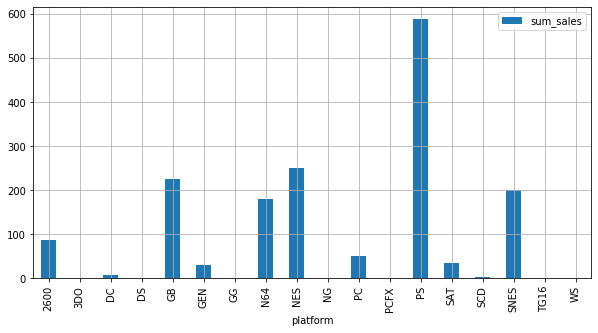

In [8]:
# посмотрим самые популярные платформы с 1980 до 2000 года
games.query('year_of_release<2000').pivot_table(index='platform', values='sum_sales', aggfunc=sum).plot(grid=True, kind='bar',figsize=(10, 5))

Вывод: самые популярные платформы в период с 1980 до 2000: PS, NES, GB, SNES, N64.

Text(0.5, 1.0, 'N64')

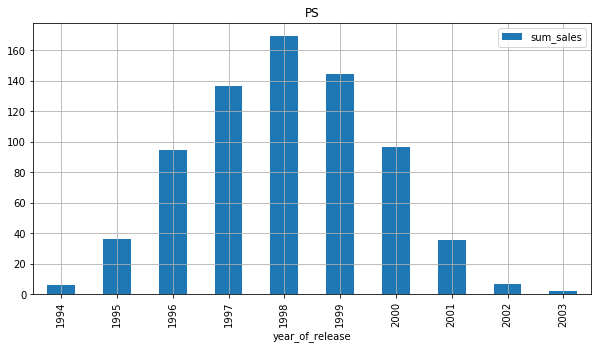

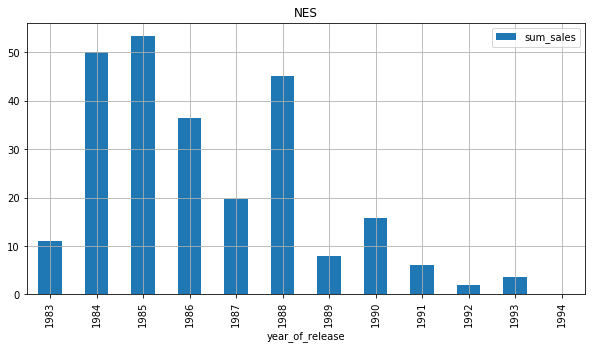

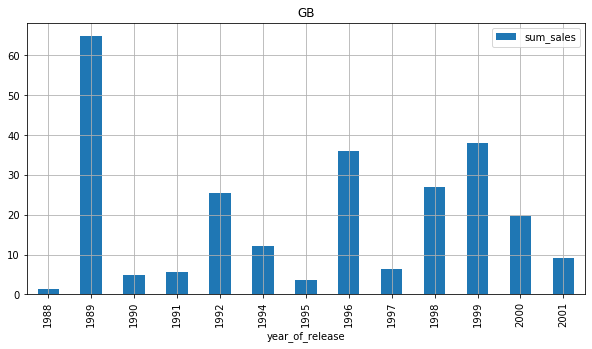

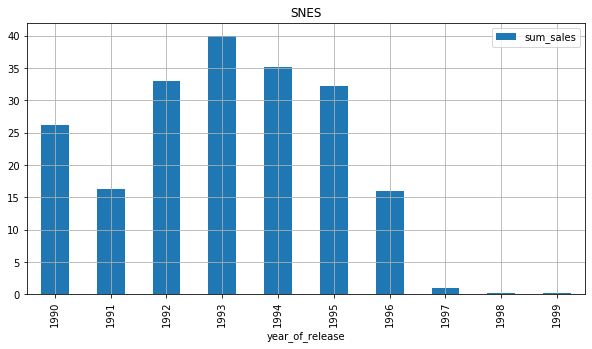

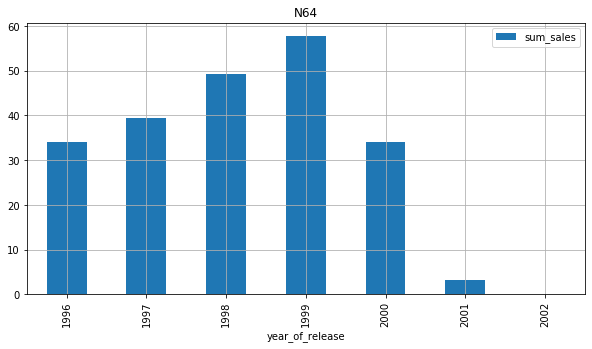

In [9]:
# выведем графики по самым популярным платформам в период с 1980 до 2000
(games
    .query('platform=="PS"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS')
(games
    .query('platform=="NES"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('NES')
(games
    .query('platform=="GB"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('GB')
(games
    .query('platform=="SNES" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('SNES')
(games
    .query('platform=="N64" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('N64')

In [10]:
#1
ps=games.query('platform=="PS"and year_of_release!=2045')
ps_min=ps['year_of_release'].min()
ps_max=ps['year_of_release'].max()
ps_diff=ps_max-ps_min
#2
nes=games.query('platform=="NES"and year_of_release!=2045')
nes_min=nes['year_of_release'].min()
nes_max=nes['year_of_release'].max()
nes_diff=nes_max-nes_min
#3
gb=games.query('platform=="GB"and year_of_release!=2045')
gb_min=gb['year_of_release'].min()
gb_max=gb['year_of_release'].max()
gb_diff=gb_max-gb_min
#4
snes=games.query('platform=="SNES"and year_of_release!=2045')
snes_min=snes['year_of_release'].min()
snes_max=snes['year_of_release'].max()
snes_diff=snes_max-snes_min
#5
n64=games.query('platform=="N64"and year_of_release!=2045')
n64_min=n64['year_of_release'].min()
n64_max=n64['year_of_release'].max()
n64_diff=wii_max-wii_min
mean=(ps_diff+nes_diff+gb_diff+snes_diff+n64_diff)/5
print('Среднее время жизни платформы: ',mean, 'лет.')

Среднее время жизни платформы:  10.4 лет.


Вывод: период для появления платформы и выхода из нее с 1980 до 2000 меньше, чем для платформ с 2000 до 2016, и составляет 10,4 года. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES  95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB.

# Определение распределения данных

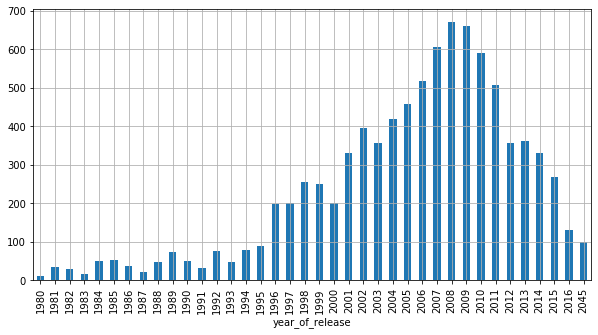

In [11]:
games.groupby('year_of_release')['sum_sales'].sum().plot(grid=True, kind='bar',figsize=(10, 5))

Количество продаж резко падает в 2016, возможно, это связано с тем, что данные за 2016 не заполнены до конца. Нормальным выглядит распределение продаж с 2003 по 2014, нужно избавиться от выбросов, чтобы убедиться в этом. А также выберем платформы с ненулевыми продажами за 2016 год, чтобы работать с ними в дальнейшем.

Избавимся от выбросов.

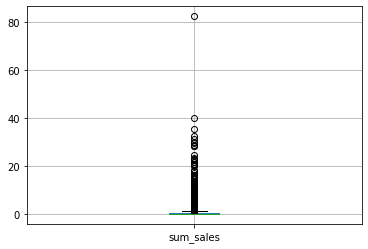

In [12]:
games.boxplot(column=['sum_sales'])

Количество суммарных продаж более 80 является выбросом.

In [13]:
games_2016=games[(games.year_of_release==2016)&(games.sum_sales>0)]
games_2016['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

#### В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.

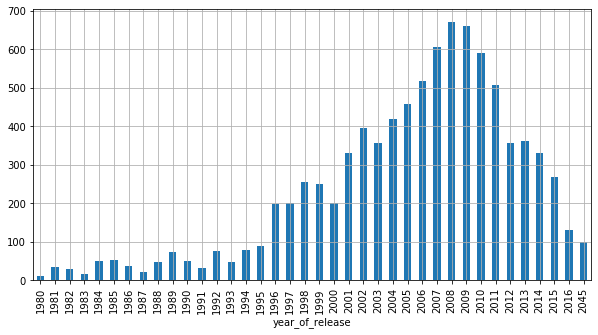

In [14]:
games.groupby('year_of_release')['sum_sales'].sum().plot(grid=True, kind='bar',figsize=(10, 5))

In [15]:
# отбрасываем выбросы
games=games[(games.sum_sales < 80)]
# по гистограмме выбираем столбцы с нормальным распределением
games=games[(games.year_of_release > 2002) & (games.year_of_release < 2016)] 

In [16]:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,12306.000000,12306.000000,12306.000000,12306.000000,12306.000000,6558.000000,6280.000000,12306.000000
mean,2008.605965,0.240423,0.142046,0.054311,0.052296,68.550168,7.068901,0.489077
std,3.275813,0.638966,0.468200,0.248666,0.196970,13.829596,1.494529,1.332203
min,2003.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2006.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.300000,0.050000
50%,2009.000000,0.080000,0.020000,0.000000,0.010000,70.000000,7.400000,0.150000
75%,2011.000000,0.230000,0.100000,0.030000,0.040000,79.000000,8.100000,0.440000
max,2015.000000,15.680000,12.760000,6.500000,10.570000,98.000000,9.700000,35.520000


Дальше работаем с данными только за период с 2003 по 2015.

#### Вывод:
Нормально распределены данные за период с 2003 по 2015 год, его используем в дальнейшей работе. Выборку платформ из 2016 сделали.

# Предсказание популярности платформ

##### В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii. 
(вывод из предыдущего блока)

In [17]:
games['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS4', '3DS', 'GBA', 'XB', 'PC',
       'PSP', 'XOne', 'WiiU', 'GC', 'PSV', 'PS', 'DC'], dtype=object)

##### В выбраном нами периоде с нормальным распределением существуют платформы: Wii, DS, X360, PS3, PS2, PS4, 3DS, GBA, XB, PC, PSP, XOne, WiiU, GC, PSV, PS, DC.
##### В 2016 существуют платформы: PS4, 3DS, XOne, WiiU, PS3, PC, X360, PSV, Wii.
(вывод из предыдущего блока)
##### Из этого следует, что ни одну платформу при анализе мы не пропускаем, при отсечении данных за 2016 год.

In [18]:
# Исключим те платформы, которые уже были изучены: PS, PS2, PS3, X360, DS, Wii.
prognoz=games[(games.platform!='PS') & (games.platform!='PS2')& (games.platform!='PS3')& (games.platform!='X360')& (games.platform!='DS')& (games.platform!='Wii')]
prognoz.head()              

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85.0,8.2,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,,11.68


###### Поистроим графики для платформ PS4, 3DS, XOne, WiiU, PC, PSV, XB. Учтем, что в 2016 году существует платформа Х360, но в выбранных нами данных ее нет.

Text(0.5, 1.0, 'DC')

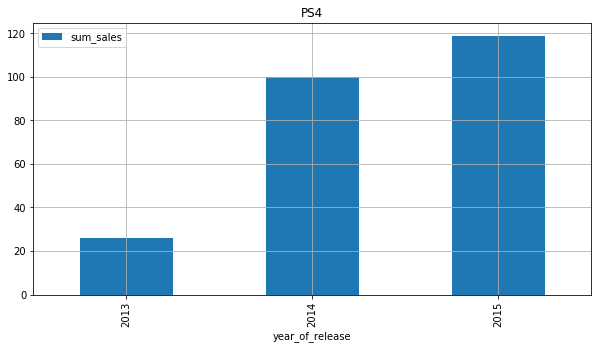

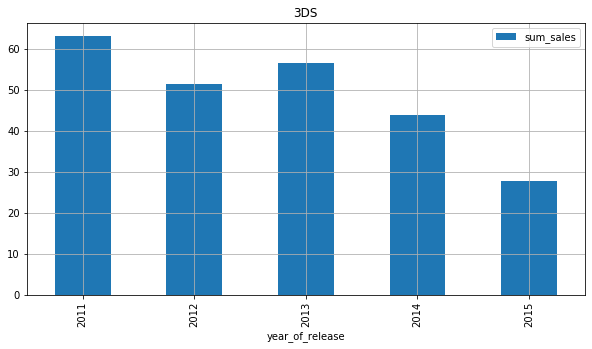

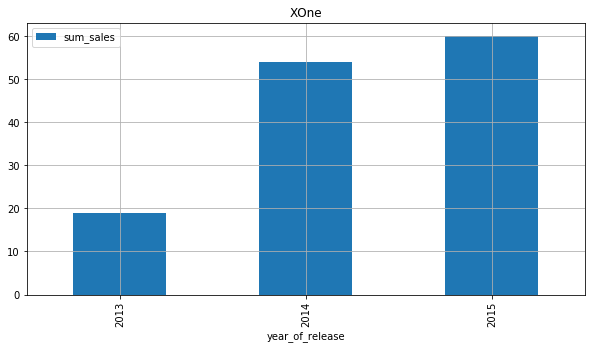

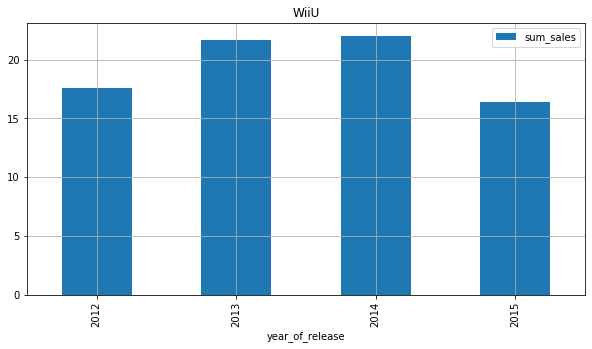

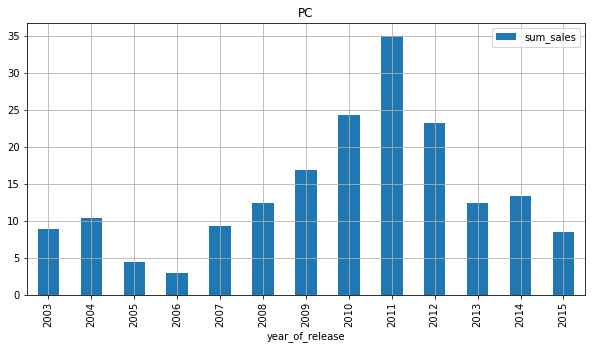

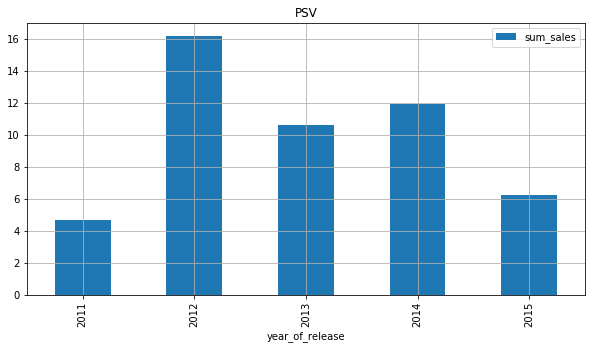

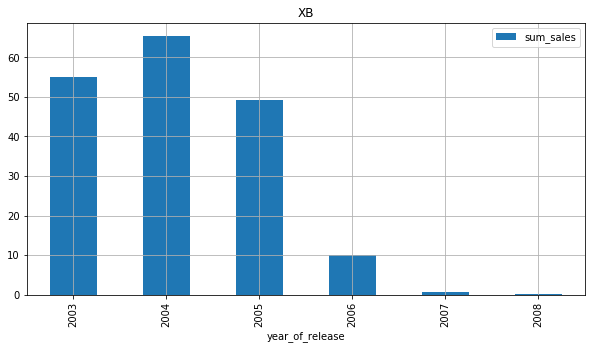

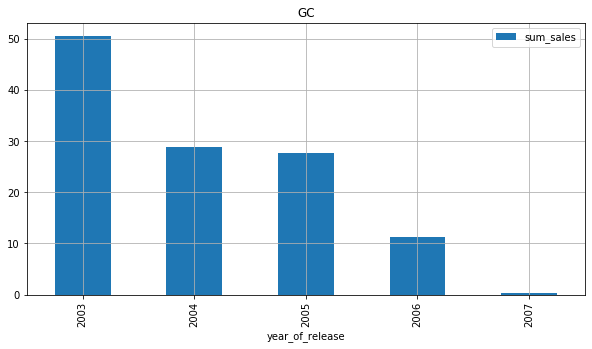

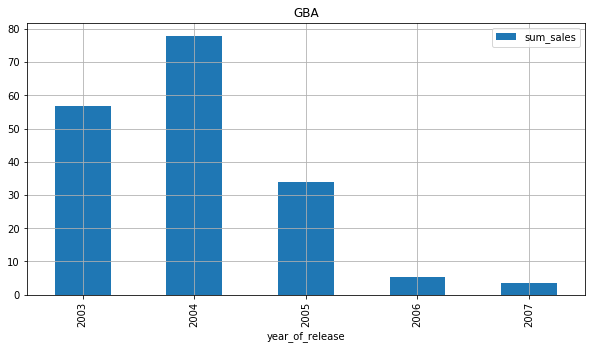

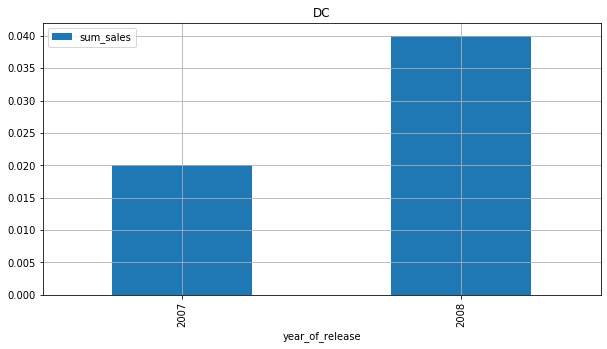

In [19]:
(prognoz
    .query('platform=="PS4"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PS4')
(prognoz
    .query('platform=="3DS"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('3DS')
(prognoz
    .query('platform=="XOne" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('XOne')
(prognoz
    .query('platform=="WiiU"and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('WiiU')
(prognoz
    .query('platform=="PC" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PC')          
(prognoz
    .query('platform=="PSV" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('PSV')        
(prognoz
    .query('platform=="XB" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('XB')
(prognoz
    .query('platform=="GC" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('GC')
(prognoz
    .query('platform=="GBA" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('GBA')
(prognoz
    .query('platform=="DC" and year_of_release!=2045')
    .pivot_table(index='year_of_release', values='sum_sales', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(10, 5))
)
plt.title('DC')

Вывод: потенциально прибыльны платформы PS4, X360 и XOne, вот в них и будем инвестировать:)

# Построение ящика с усами

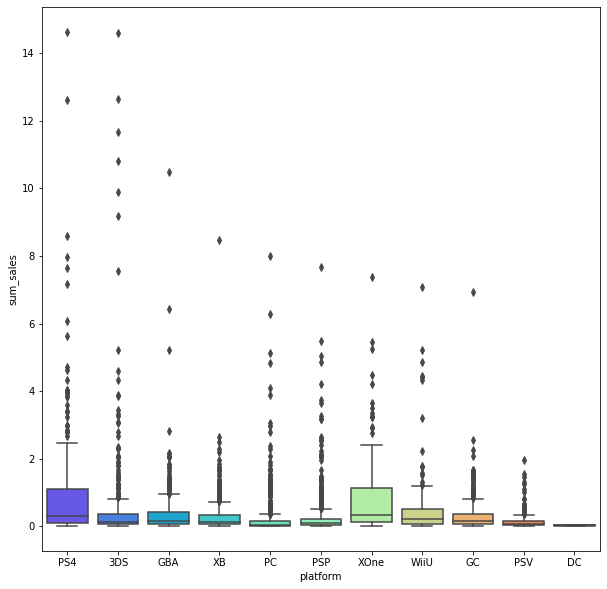

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot (x = 'platform', y = 'sum_sales', data = prognoz, palette='rainbow')

###### Вывод: 
или все, или ничего. Такая судьба у игровых платформ. Продажи XOne и PS4 сильно выделяются на фоне остальных, что неудивительно, потому что это мастодонты рынка. 

# Оценка влияния оценки пользователей и критиков на продажи

In [21]:
corr = games[['critic_score', 'user_score', 'na_sales', 'eu_sales', 'jp_sales']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score,na_sales,eu_sales,jp_sales
critic_score,1,0.57714,0.266193,0.249969,0.133017
user_score,0.57714,1,0.0786947,0.0510185,0.110179
na_sales,0.266193,0.0786947,1,0.793403,0.417326
eu_sales,0.249969,0.0510185,0.793403,1,0.467837
jp_sales,0.133017,0.110179,0.417326,0.467837,1


Линейная зависимость между оценками критиков и пользователей минимальна. Посмотрим что на графиках.

##### Построим графики зависимости продаж от оценок

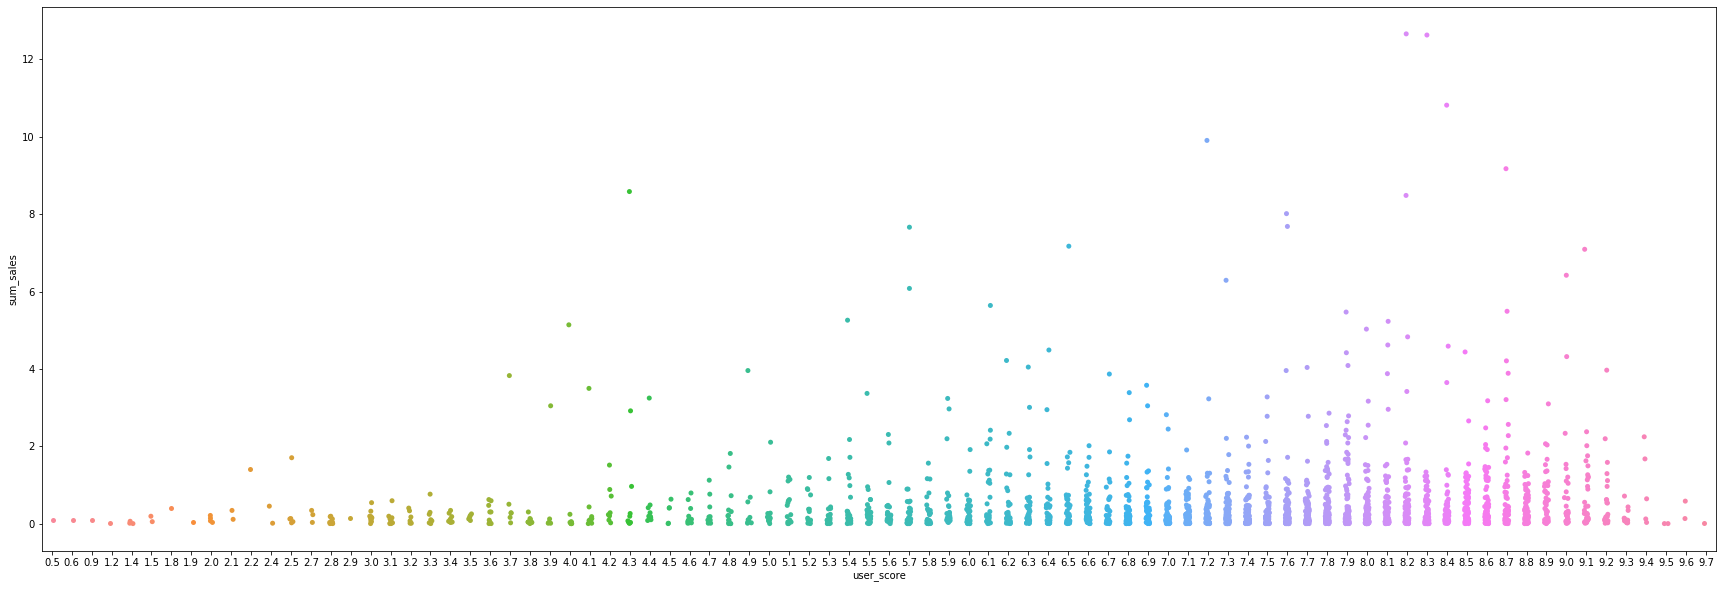

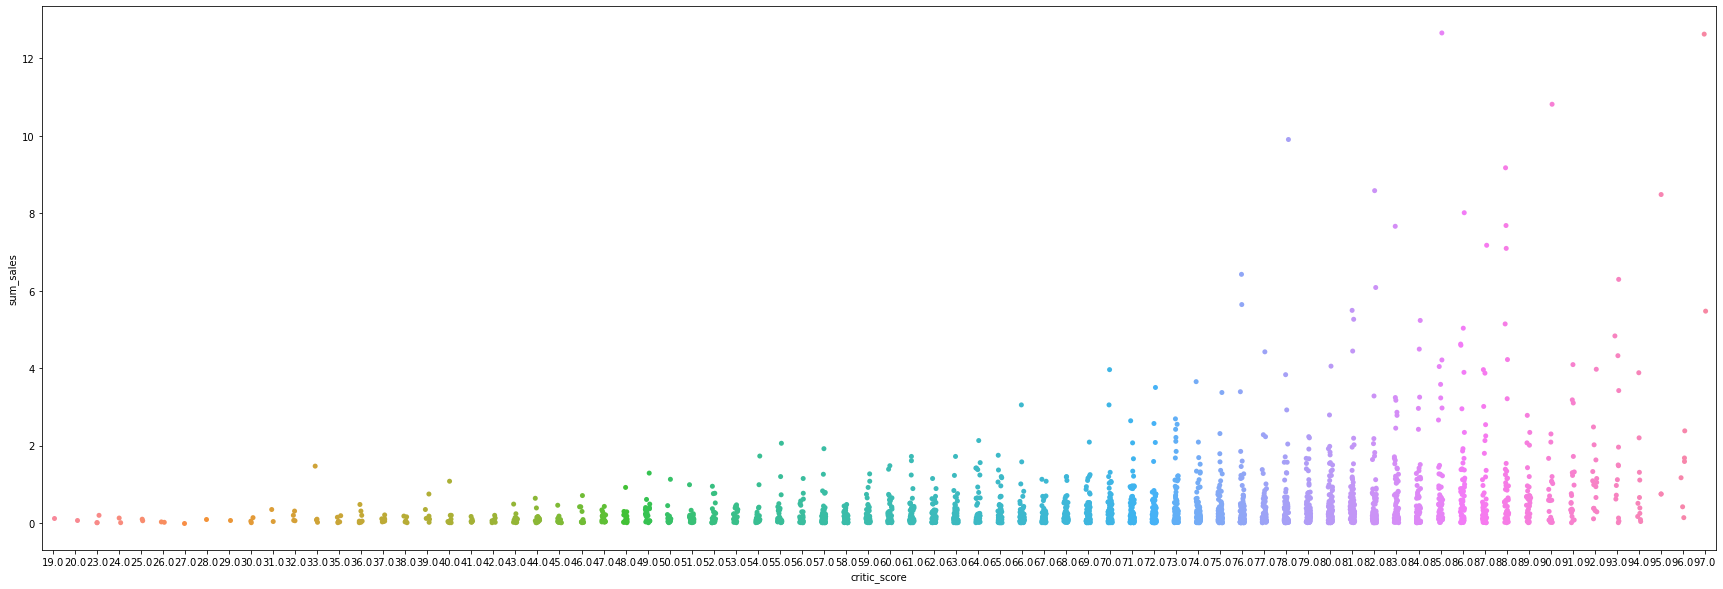

In [22]:
plt.figure(figsize=(30,10))
sns.stripplot(x = 'user_score', y = 'sum_sales', data = prognoz, jitter = True)
plt.figure(figsize=(30,10))
sns.stripplot(x = 'critic_score', y = 'sum_sales', data = prognoz, jitter = True)

###### Вывод: 
чем выше оценка, тем больше продаж, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков. Хм, похоже, с критиками нужно дружить:)

Text(0.5, 1.0, 'Распределение продаж для различных платформ')

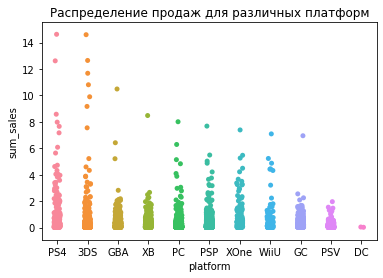

In [23]:
sns.stripplot(x = 'platform', y = 'sum_sales', data = prognoz, jitter = True)
plt.title('Распределение продаж для различных платформ')

#### Вывод: 
в основном общие продажи игр распределены в диапазоне до 5. Это означает, что зарабатывают на играх для платформ в основном создатели платформ, а не разработчики игр для них. Но если вы разработчик, то пишите игры для PS4 и 3DS, без хлеба точно не останетесь.

In [24]:
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).head())
print(games.groupby(by='genre').agg({'sum_sales':'sum'}).sort_values(by='sum_sales', ascending=False).tail())

              sum_sales
genre                  
Action          1316.04
Sports           866.88
Shooter          794.37
Misc             668.18
Role-Playing     616.84
            sum_sales
genre                
Simulation     299.79
Fighting       244.15
Adventure      156.73
Puzzle         121.09
Strategy        92.36


#### Вывод: 
наиболее популярны игры жанров экшн, спорт, шутеры, аркады и ролевые игры, те игры, в которых получаешь эмоцию от происходящего. Наименее популярны игры, в которых нужно думать или совершать однотипные действия: симуляции, бои, приключения, пазлы и стратегии. Связано это еще и с ценой на игры, производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

# Портрет пользователя каждого региона

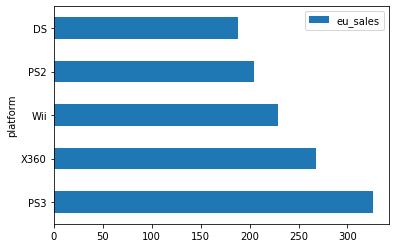

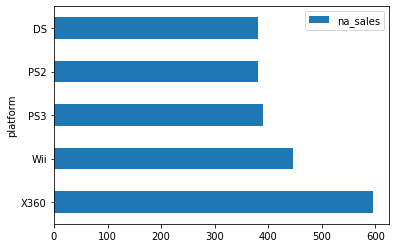

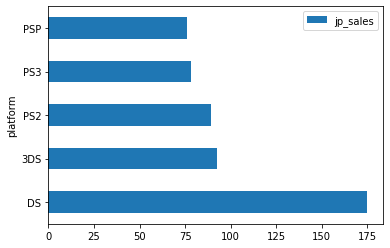

In [25]:
games.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh')

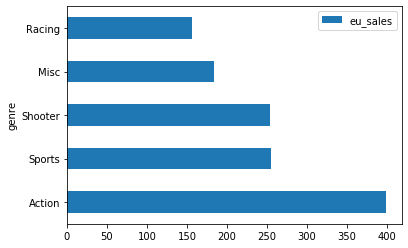

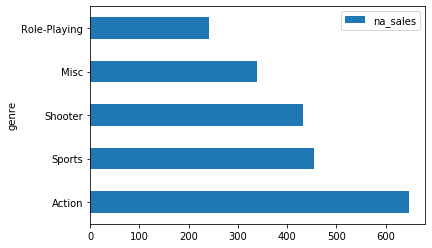

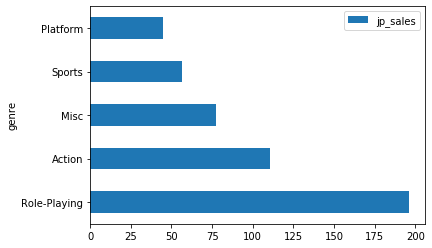

In [26]:
games.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh')

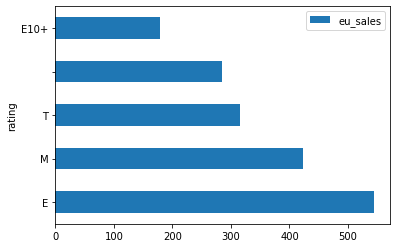

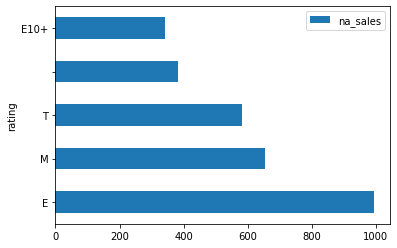

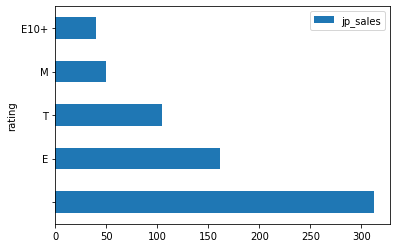

In [27]:
games.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='barh')
games.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='barh')

###### Вывод: 
жанры для игр в Северной Америке, Европе и Японии популярны одни и те же, а вот игровые платформы у японцев значительно отличаются. В разы различаются и продажи в этих регионах: больше всего продаж в Северной Америке, меньше всего в Японии. Предполагаю, что связано это с разным менталитетом этих регионов. Зависимость от рейтинга отслеживается во всех трех регионах. Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет" и "для взрослых"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры без определенного рейтинга). Ситуация в Японии связана с тем, что получить возрастной рейтинг на японском рынке сложно и дорого. Начинает это с того, что всё общение и вся документация — на японском языке. «Google Переводчиком» в данной ситуации пользоваться не стоит, лучше найти человека со знанием языка или студию локализации.

Есть 2 варианта для построения отношений:
* разовый платёж. Вы хотите единожды сделать рейтинг для одной игры и на одну (или несколько) платформу — стоило это на 2018 год примерно 2 тысячи евро.
* членство. У вас есть как вступительный взнос, так и взнос за каждую игру, но цена за оценку игры ниже, чем разовая оценка в первом варианте. То есть в перспективе, если вы планируйте делать 5-7 релизов и на 3-4 платформы, вам стоит рассмотреть и членство в данном агентстве.

# Исследование статистических показателей

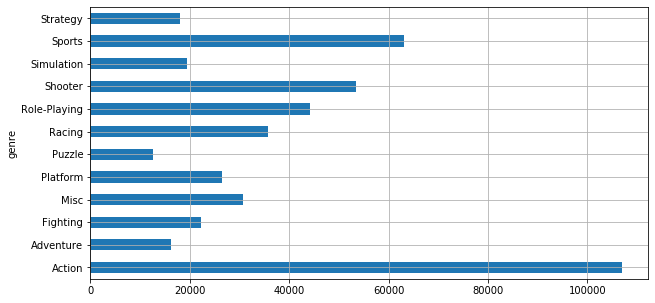

In [28]:
games.groupby('genre')['critic_score'].sum().plot(grid=True, kind='barh',figsize=(10, 5))

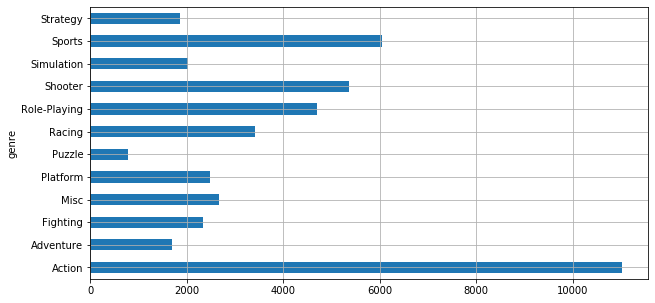

In [29]:
games.groupby('genre')['user_score'].sum().plot(grid=True, kind='barh',figsize=(10, 5))

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Action по годам')

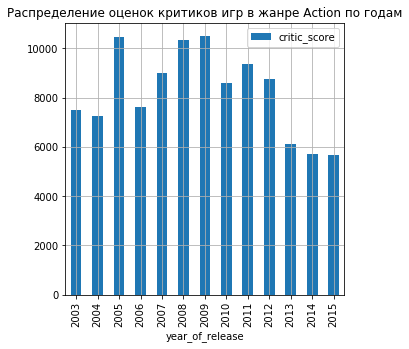

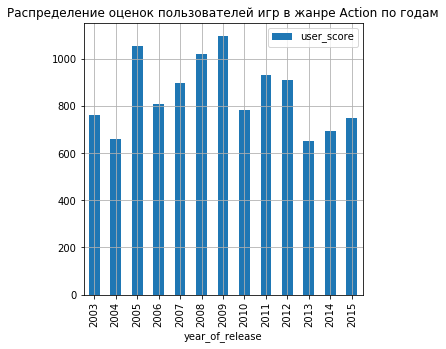

In [30]:
(games
    .query('genre=="Action"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Action по годам')
(games
    .query('genre=="Action"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Action по годам')


Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Adventure по годам')

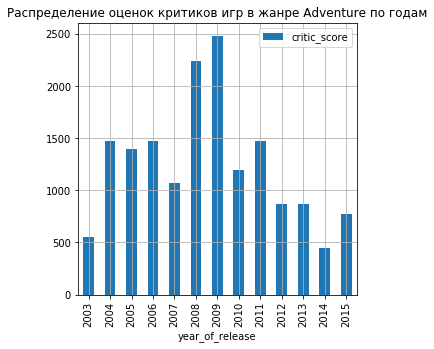

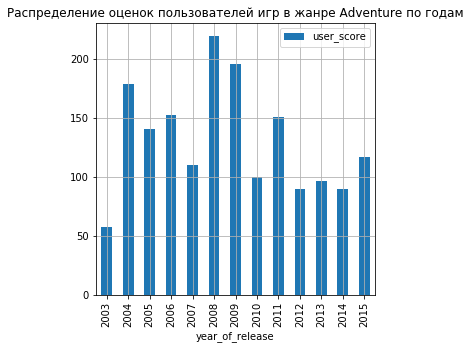

In [31]:
(games
    .query('genre=="Adventure"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Adventure по годам')
(games
    .query('genre=="Adventure"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Adventure по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Fighting по годам')

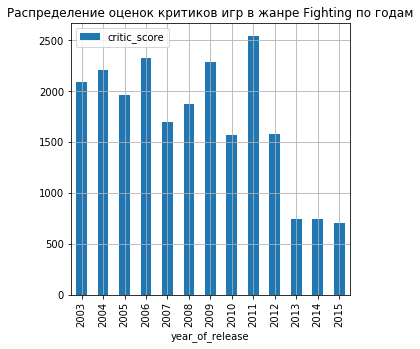

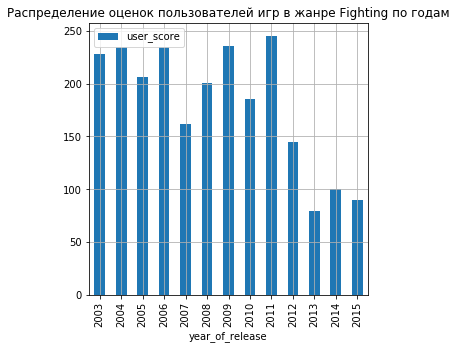

In [32]:
(games
    .query('genre=="Fighting"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Fighting по годам')
(games
    .query('genre=="Fighting"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Fighting по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Misc по годам')

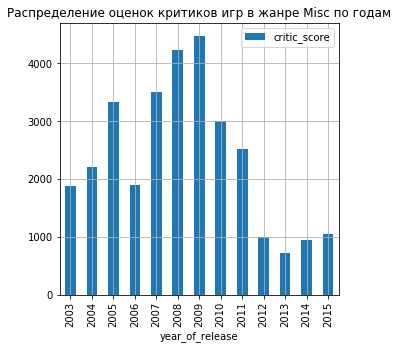

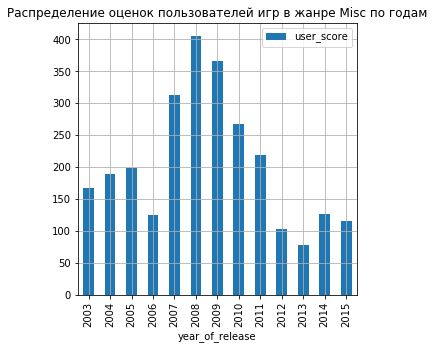

In [33]:
(games
    .query('genre=="Misc"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Misc по годам')
(games
    .query('genre=="Misc"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Misc по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Platform по годам')

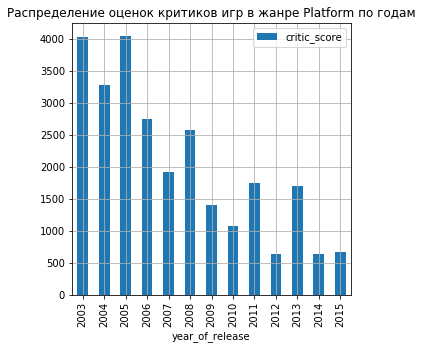

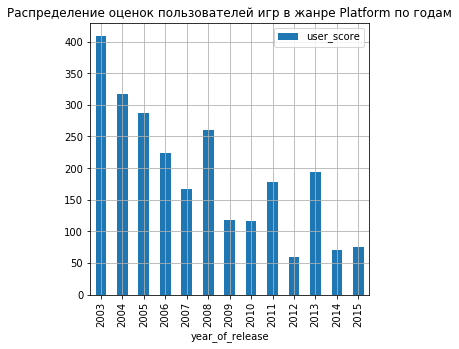

In [34]:
(games
    .query('genre=="Platform"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Platform по годам')
(games
    .query('genre=="Platform"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Platform по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Puzzle по годам')

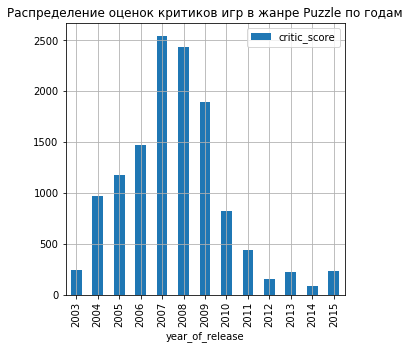

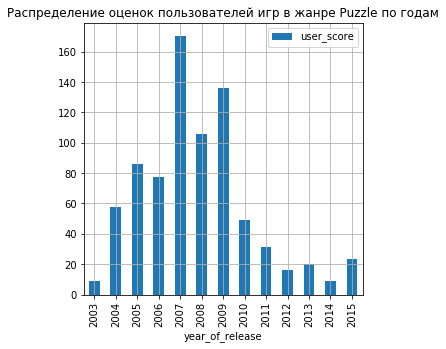

In [35]:
(games
    .query('genre=="Puzzle"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Puzzle по годам')
(games
    .query('genre=="Puzzle"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Puzzle по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Racing по годам')

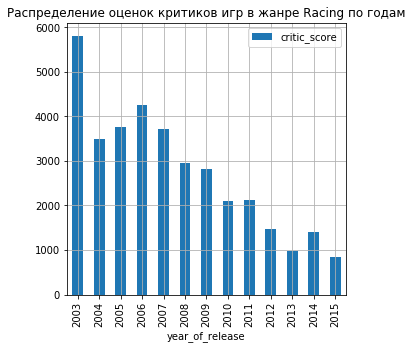

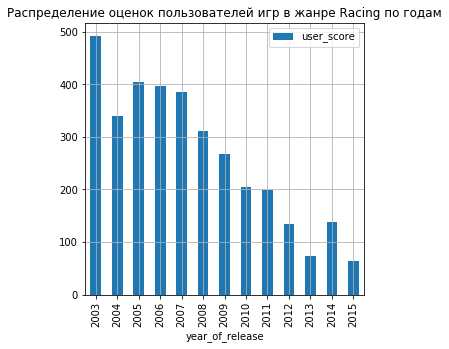

In [36]:
(games
    .query('genre=="Racing"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Racing по годам')
(games
    .query('genre=="Racing"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Racing по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Role_Playing по годам')

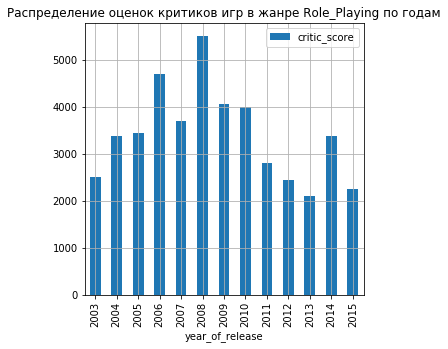

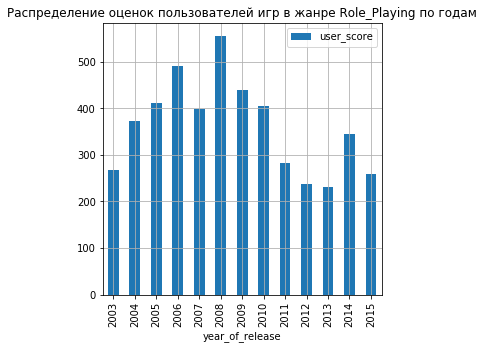

In [37]:
(games
    .query('genre=="Role-Playing"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Role_Playing по годам')
(games
    .query('genre=="Role-Playing"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Role_Playing по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Shooter по годам')

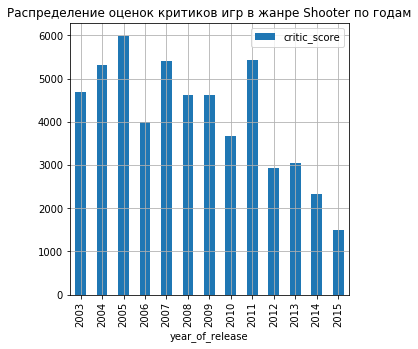

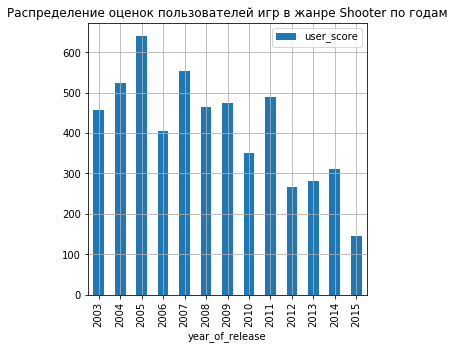

In [38]:
(games
    .query('genre=="Shooter"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Shooter по годам')
(games
    .query('genre=="Shooter"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Shooter по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Simulation по годам')

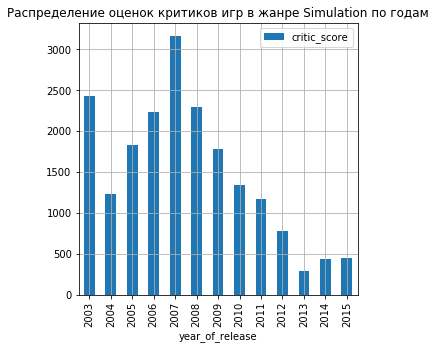

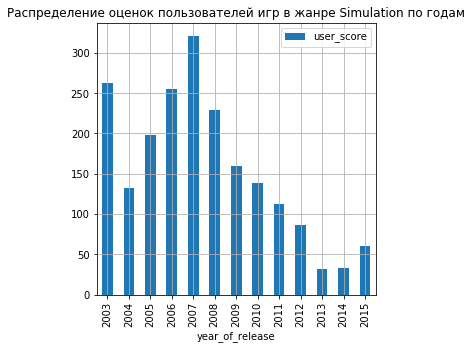

In [39]:
(games
    .query('genre=="Simulation"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Simulation по годам')
(games
    .query('genre=="Simulation"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Simulation по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Sports по годам')

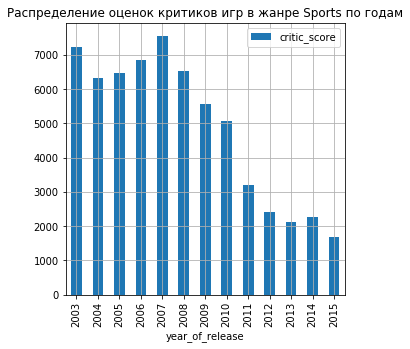

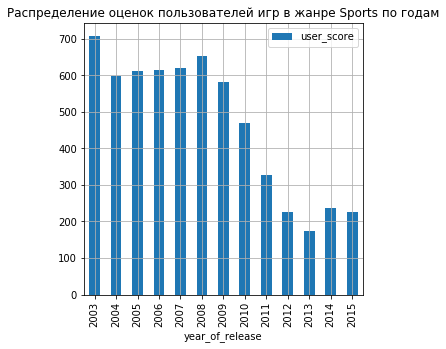

In [40]:
(games
    .query('genre=="Sports"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Sports по годам')
(games
    .query('genre=="Sports"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Sports по годам')

Text(0.5, 1.0, 'Распределение оценок пользователей игр в жанре Strategy по годам')

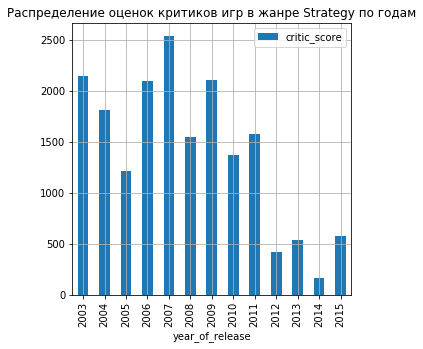

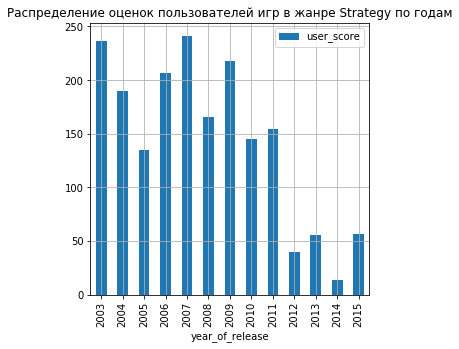

In [41]:
(games
    .query('genre=="Strategy"')
    .pivot_table(index='year_of_release', values='critic_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок критиков игр в жанре Strategy по годам')
(games
    .query('genre=="Strategy"')
    .pivot_table(index='year_of_release', values='user_score', aggfunc=sum)
    .plot(grid=True, kind='bar',figsize=(5, 5))
)
plt.title('Распределение оценок пользователей игр в жанре Strategy по годам')

Вывод: в большинстве жанров оценок и критиков, и пользователей после 2007 года уменьшилось. Связано это с тем, что рынок игр в то время было принято хоронить, игры ушли на мобильные устройства и ПК, росли продажи только на стратегии и ролевые игры.

In [42]:
corr = games[['critic_score', 'user_score']].corr()
corr.style.background_gradient(cmap='coolwarm')

,critic_score,user_score
critic_score,1,0.57714
user_score,0.57714,1


Оценка критиков и пользователей зависят на 57,7%. Эта корреляция действительна и для жанров.Критики выше оценивают жанры, чем пользователи. 

In [43]:
action_user = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
adventure_user = games[(games['genre'] == 'Adventure') & (games['user_score'] > 0)]['user_score']
fighting_user = games[(games['genre'] == 'Fighting') & (games['user_score'] > 0)]['user_score']
misc_user= games[(games['genre'] == 'Misc') & (games['user_score'] > 0)]['user_score']
platform_user= games[(games['genre'] == 'Platform') & (games['user_score'] > 0)]['user_score']
puzzle_user= games[(games['genre'] == 'Puzzle') & (games['user_score'] > 0)]['user_score']
role_playing_user= games[(games['genre'] == 'Role-Playing') & (games['user_score'] > 0)]['user_score']
shooter_user= games[(games['genre'] == 'Shooter') & (games['user_score'] > 0)]['user_score']
simulation_user= games[(games['genre'] == 'Simulation') & (games['user_score'] > 0)]['user_score']
sports_user= games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
strategy_user= games[(games['genre'] == 'Strategy') & (games['user_score'] > 0)]['user_score']

In [44]:
action_critic = games[(games['genre'] == 'Action') & (games['critic_score'] > 0)]['critic_score']
adventure_critic = games[(games['genre'] == 'Adventure') & (games['critic_score'] > 0)]['critic_score']
fighting_critic = games[(games['genre'] == 'Fighting') & (games['critic_score'] > 0)]['critic_score']
misc_critic= games[(games['genre'] == 'Misc') & (games['critic_score'] > 0)]['critic_score']
platform_critic= games[(games['genre'] == 'Platform') & (games['critic_score'] > 0)]['critic_score']
puzzle_critic= games[(games['genre'] == 'Puzzle') & (games['critic_score'] > 0)]['critic_score']
role_playing_critic= games[(games['genre'] == 'Role-Playing') & (games['critic_score'] > 0)]['critic_score']
shooter_critic= games[(games['genre'] == 'Shooter') & (games['critic_score'] > 0)]['critic_score']
simulation_critic= games[(games['genre'] == 'Simulation') & (games['critic_score'] > 0)]['critic_score']
sports_critic= games[(games['genre'] == 'Sports') & (games['critic_score'] > 0)]['critic_score']
strategy_critic= games[(games['genre'] == 'Strategy') & (games['critic_score'] > 0)]['critic_score']

In [45]:
print('Дисперсия пользовательских оценок Action: {:.2f}'.format(np.var(action_user)))
print('Дисперсия оценок критиков Action: {:.2f}'.format(np.var(action_critic)))
print('Среднее отклонение оценок пользователей Action: {:.2f}'.format(np.std(action_user)))
print('Среднее отклонение оценок критиков Action: {:.2f}'.format(np.std(action_critic)))

Дисперсия пользовательских оценок Action: 1.94
Дисперсия оценок критиков Action: 196.24
Среднее отклонение оценок пользователей Action: 1.39
Среднее отклонение оценок критиков Action: 14.01


In [46]:
print('Дисперсия пользовательских оценок Adventure: {:.2f}'.format(np.var(adventure_user)))
print('Дисперсия оценок критиков Adventure: {:.2f}'.format(np.var(adventure_critic)))
print('Среднее отклонение оценок пользователей Adventure: {:.2f}'.format(np.std(adventure_user)))
print('Среднее отклонение оценок критиков Adventure: {:.2f}'.format(np.std(adventure_critic)))

Дисперсия пользовательских оценок Adventure: 2.76
Дисперсия оценок критиков Adventure: 195.65
Среднее отклонение оценок пользователей Adventure: 1.66
Среднее отклонение оценок критиков Adventure: 13.99


In [47]:
print('Дисперсия пользовательских оценок Fighting: {:.2f}'.format(np.var(fighting_user)))
print('Дисперсия оценок критиков Fighting: {:.2f}'.format(np.var(fighting_critic)))
print('Среднее отклонение оценок пользователей Fighting: {:.2f}'.format(np.std(fighting_user)))
print('Среднее отклонение оценок критиков Fighting: {:.2f}'.format(np.std(fighting_critic)))

Дисперсия пользовательских оценок Fighting: 1.84
Дисперсия оценок критиков Fighting: 196.92
Среднее отклонение оценок пользователей Fighting: 1.36
Среднее отклонение оценок критиков Fighting: 14.03


In [48]:
print('Дисперсия пользовательских оценок Misc: {:.2f}'.format(np.var(misc_user)))
print('Дисперсия оценок критиков Misc: {:.2f}'.format(np.var(misc_critic)))
print('Среднее отклонение оценок пользователей Misc: {:.2f}'.format(np.std(misc_user)))
print('Среднее отклонение оценок критиков Misc: {:.2f}'.format(np.std(misc_critic)))

Дисперсия пользовательских оценок Misc: 2.45
Дисперсия оценок критиков Misc: 191.64
Среднее отклонение оценок пользователей Misc: 1.57
Среднее отклонение оценок критиков Misc: 13.84


In [49]:
print('Дисперсия пользовательских оценок Platform: {:.2f}'.format(np.var(platform_user)))
print('Дисперсия оценок критиков Platform: {:.2f}'.format(np.var(platform_critic)))
print('Среднее отклонение оценок пользователей Platform: {:.2f}'.format(np.std(platform_user)))
print('Среднее отклонение оценок критиков Platform: {:.2f}'.format(np.std(platform_critic)))

Дисперсия пользовательских оценок Platform: 2.18
Дисперсия оценок критиков Platform: 167.93
Среднее отклонение оценок пользователей Platform: 1.48
Среднее отклонение оценок критиков Platform: 12.96


In [50]:
print('Дисперсия пользовательских оценок Puzzle: {:.2f}'.format(np.var(puzzle_user)))
print('Дисперсия оценок критиков Puzzle: {:.2f}'.format(np.var(puzzle_critic)))
print('Среднее отклонение оценок пользователей Puzzle: {:.2f}'.format(np.std(puzzle_user)))
print('Среднее отклонение оценок критиков Puzzle: {:.2f}'.format(np.std(puzzle_critic)))

Дисперсия пользовательских оценок Puzzle: 2.40
Дисперсия оценок критиков Puzzle: 156.50
Среднее отклонение оценок пользователей Puzzle: 1.55
Среднее отклонение оценок критиков Puzzle: 12.51


In [51]:
print('Дисперсия пользовательских оценок Role-Playing: {:.2f}'.format(np.var(role_playing_user)))
print('Дисперсия оценок критиков Role-Playing: {:.2f}'.format(np.var(role_playing_critic)))
print('Среднее отклонение оценок пользователей Role-Playing: {:.2f}'.format(np.std(role_playing_user)))
print('Среднее отклонение оценок критиков Role-Playing: {:.2f}'.format(np.std(role_playing_critic)))

Дисперсия пользовательских оценок Role-Playing: 1.17
Дисперсия оценок критиков Role-Playing: 139.18
Среднее отклонение оценок пользователей Role-Playing: 1.08
Среднее отклонение оценок критиков Role-Playing: 11.80


In [52]:
print('Дисперсия пользовательских оценок Shooter: {:.2f}'.format(np.var(shooter_user)))
print('Дисперсия оценок критиков Shooter: {:.2f}'.format(np.var(shooter_critic)))
print('Среднее отклонение оценок пользователей Shooter: {:.2f}'.format(np.std(shooter_user)))
print('Среднее отклонение оценок критиков Shooter: {:.2f}'.format(np.std(shooter_critic)))

Дисперсия пользовательских оценок Shooter: 2.32
Дисперсия оценок критиков Shooter: 218.65
Среднее отклонение оценок пользователей Shooter: 1.52
Среднее отклонение оценок критиков Shooter: 14.79


In [53]:
print('Дисперсия пользовательских оценок Simulation: {:.2f}'.format(np.var(simulation_user)))
print('Дисперсия оценок критиков Simulation: {:.2f}'.format(np.var(simulation_critic)))
print('Среднее отклонение оценок пользователей Simulation: {:.2f}'.format(np.std(simulation_user)))
print('Среднее отклонение оценок критиков Simulation: {:.2f}'.format(np.std(simulation_critic)))

Дисперсия пользовательских оценок Simulation: 2.58
Дисперсия оценок критиков Simulation: 153.48
Среднее отклонение оценок пользователей Simulation: 1.60
Среднее отклонение оценок критиков Simulation: 12.39


In [54]:
print('Дисперсия пользовательских оценок Sports: {:.2f}'.format(np.var(sports_user)))
print('Дисперсия оценок критиков Sports: {:.2f}'.format(np.var(sports_critic)))
print('Среднее отклонение оценок пользователей Sports: {:.2f}'.format(np.std(sports_user)))
print('Среднее отклонение оценок критиков Sports: {:.2f}'.format(np.std(sports_critic)))

Дисперсия пользовательских оценок Sports: 2.57
Дисперсия оценок критиков Sports: 189.54
Среднее отклонение оценок пользователей Sports: 1.60
Среднее отклонение оценок критиков Sports: 13.77


In [55]:
print('Дисперсия пользовательских оценок Strategy: {:.2f}'.format(np.var(strategy_user)))
print('Дисперсия оценок критиков Strategy: {:.2f}'.format(np.var(strategy_critic)))
print('Среднее отклонение оценок пользователей Strategy: {:.2f}'.format(np.std(strategy_user)))
print('Среднее отклонение оценок критиков Strategy: {:.2f}'.format(np.std(strategy_critic)))

Дисперсия пользовательских оценок Strategy: 2.87
Дисперсия оценок критиков Strategy: 137.15
Среднее отклонение оценок пользователей Strategy: 1.69
Среднее отклонение оценок критиков Strategy: 11.71


Оценки критиков и пользователей для большинства жанров разбросаны равномерно. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.

In [56]:
variance_user = np.var(games['user_score'])
print('Дисперсия пользовательских оценок: {:.2f}'.format(variance_user))
variance_critic = np.var(games['critic_score'])
print('Дисперсия оценок критиков: {:.2f}'.format(variance_critic)) 

Дисперсия пользовательских оценок: 2.23
Дисперсия оценок критиков: 191.23


In [57]:
mean_value_user =  games['user_score'].mean()
mean_value_critic =  games['critic_score'].mean()
spacing_all_user = games['user_score']  - mean_value_user # для каждого элемента датасета находим расстояние от среднего значения
spacing_all_critic = games['critic_score']  - mean_value_critic
spacing_all_mean_user = spacing_all_user.mean()
spacing_all_mean_critic = spacing_all_critic.mean()
print('Среднее расстояние между пользовательскими оценками',spacing_all_mean_user)
print('Среднее расстояние между оценками критиков',spacing_all_mean_critic)#  считаем среднее расстояние

Среднее расстояние между пользовательскими оценками -8.508409829484002e-16
Среднее расстояние между оценками критиков -5.270021144765366e-15


Откуда взялся нулевой разброс, если все значения в наборе данных разные?
Это произошло из-за того, что я складывала расстояния от среднего до значений больше него с расстояниями от среднего до значений меньше него. Одни получились положительными, другие — отрицательными. Расстояния компенсировали друг друга, и в итоге получился ноль.
Избавимся от знаков при подсчёте, сделав все значения неотрицательными — возведём значения расстояний в квадрат.
Улучшенная метрика разброса — не просто среднее расстояние между значениями датасета и средним, а средний квадрат этого расстояния. Эта величина называется дисперсия (лат. dispersio, «рассеяние»).

In [58]:
variance_user = np.var(games['user_score'])
print('Дисперсия пользовательских оценок: {:.2f}'.format(variance_user))
variance_critic = np.var(games['critic_score'])
print('Дисперсия оценок критиков: {:.2f}'.format(variance_critic)) 

Дисперсия пользовательских оценок: 2.23
Дисперсия оценок критиков: 191.23


In [59]:
standart_dev_user=np.sqrt(variance_user)
print ('Стандартное отклонение пользовательских оценок: {:.2f}'.format(standart_dev_user))
standart_dev_critic=np.sqrt(variance_critic)
print ('Стандартное отклонение оценок критиков: {:.2f}'.format(standart_dev_critic))

Стандартное отклонение пользовательских оценок: 1.49
Стандартное отклонение оценок критиков: 13.83


In [60]:
variance_user = np.var(games['user_score'])
print('Дисперсия пользовательских оценок: {:.2f}'.format(variance_user))
variance_critic = np.var(games['critic_score'])
print('Дисперсия оценок критиков: {:.2f}'.format(variance_critic)) 

Дисперсия пользовательских оценок: 2.23
Дисперсия оценок критиков: 191.23


#### Выводы: 
пользовательские оценки и оценки критиков разбросаны равномерно для большинства жанров. Критики чаще ставят низкие оценки и оценивают жанры, которые пользователи считают непопулярными. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.

# Проверка гипотез

H0. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

H1. Средние пользовательские рейтинги платформ Xbox One и PC различны.

In [61]:
alpha = 0.05
xbox = games[(games['platform'] == 'XOne') & (games['user_score'] > 0)]['user_score']
pc = games[(games['platform'] == 'PC') & (games['user_score'] > 0)]['user_score']
if np.var(xbox)==np.var(pc):
    print('True')
else:
    print('False')

False


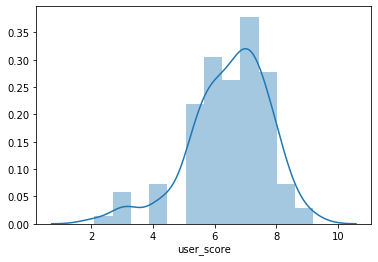

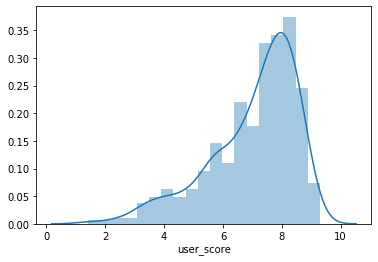

In [62]:
sns.distplot(xbox)
plt.show()
sns.distplot(pc)
plt.show()

###### Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна,.

In [63]:
results = scipy.stats.ttest_ind(xbox, pc, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 6.984889036841548e-05
Отвергаем нулевую гипотезу


H0. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковы.

H1. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [64]:
alpha = 0.05
action = games[(games['genre'] == 'Action') & (games['user_score'] > 0)]['user_score']
sports = games[(games['genre'] == 'Sports') & (games['user_score'] > 0)]['user_score']
if np.var(action)==np.var(sports):
    print('True')
else:
    print('False')

False


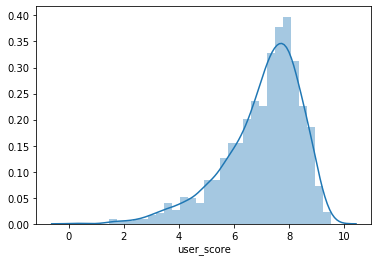

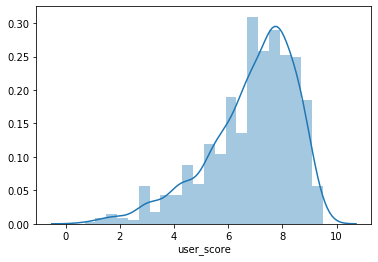

In [65]:
sns.distplot(action)
plt.show()
sns.distplot(sports)
plt.show()

###### Распределение Гауссовское, используем Т-критерий Стьюдентса, дисперсия выборок не равна.

In [66]:
results=scipy.stats.ttest_ind(action, sports, equal_var = False)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.011878765616484769
Отвергаем нулевую гипотезу


Вывод: пользовательские рейтинги для платформ Xbox и PC различны. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») тоже различны.

# Общие выводы

Геймдейв медленно и верно теряет обороты, игры ушли на мобильные устройства. Люди играть в приставки не перестали, поэтому не останавливаются и разработчики, хотя делают это уже более осмотрительно. 

Пятерка самых популярных платформ набрала свою популярность с начала 2000-х. Период от первых продаж до исчезновения продаж в среднем занимает 14 лет. Период для появления платформы и выхода из нее с 1980 до 2000 такой же, как и для платформ с 2000 до 2016, от 9 до 11 лет. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES 95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB. Период для появления платформы и выхода из нее с 1980 до 2000 меньше, чем для платформ с 2000 до 2016, и составляет 10,4 года. Платформа PS трансформировалась в PS2 и PS3. Платформа NES уступила свое место более совершенным SNES с более совершенной приставкой Sega Mega Drive, также как до этого N64 уступила свое место NES. SNES 95 году обещали выпустить новую приставку, несколько раз переносили презентацию, в итоге для новой приставки выпустили 22 игры, все японского производства и платформа перестала существовать. GB были линейкой портативных устройств от компании Nintendo (N64, NES, SNES), с уходом Nintendo с рынка исчезли и GB.  Нормально распределены данные за период с 2003 по 2015 год, их используем в дальнейшей работе. Потенциально прибыльны платформы PS4, X360 и XOne, что неудивительно, потому что это мастодонты рынка. 

От уровня оценки прямо пропорционально зависят продажи, и не важно оценил игру пользователь или критик. А также самые дорогие продажи приходятся на самые высокие оценки критиков. Жанры для игр в Северной Америке, Европе и Японии популярны одни и те же, а вот игровые платформы у японцев значительно отличаются. В разы различаются и продажи в этих регионах: больше всего продаж в Северной Америке, меньше всего в Японии. Предполагаю, что связано это с разным менталитетом этих регионов. Зависимость от рейтинга отслеживается во всех трех регионах. Наиболее популярны игры с рейтингом "для всех", "подросткам","детям старше 10 лет" и "для взрослых"(в Европе и Северной Америке спрос на них выше, японцы больше предпочитают игры без определенного рейтинга). Ситуация в Японии связана с тем, что получить возрастной рейтинг на японском рынке сложно и дорого. Начинает это с того, что всё общение и вся документация — на японском языке. «Google Переводчиком» в данной ситуации пользоваться не стоит, лучше найти человека со знанием языка или студию локализации. 

Есть 2 варианта для построения отношений: 

* разовый платёж. Вы хотите единожды сделать рейтинг для одной игры и на одну (или несколько) платформу — стоило это на 2018 год примерно 2 тысячи евро. 
* членство. У вас есть как вступительный взнос, так и взнос за каждую игру, но цена за оценку игры ниже, чем разовая оценка в первом варианте. То есть в перспективе, если вы планируйте делать 5-7 релизов и на 3-4 платформы, вам стоит рассмотреть и членство в данном агентстве. 

В большинстве жанров оценок и критиков, и пользователей после 2007 года уменьшилось. Связано это с тем, что рынок игр в то время было принято хоронить, игры ушли на мобильные устройства и ПК, росли продажи только на стратегии и ролевые игры.Оценки критиков и пользователей для большинства жанров разбросаны равномерно. Пользователи оценивают стратегии, спорт и симуляции выше критиков, а критики ценят пазлы больше пользователей.

<div class="alert alert-success">
<h2> Комментарий ревьюера 3</h2>

Помарки исправлены, теперь работа выполнена хорошо. У тебя получился классный проект, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Спасибо за комментарии по исправлениям. Успехов в дальнейшем пути :)

</div>